# Final Project - DDSM

By: Elor Israeli, Roy Wesker and Maya Hayat

### Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import autokeras as ak

ModuleNotFoundError: No module named 'autokeras'

## Aim

This project aims to evaluate the precision that can be attained through attribute data (and mask attributes) alone.
This goal will be achieved by following the next steps:

1. Visuallizing our data
2. Choosing baselines and attributes in order to best classify subtlety.

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


## Phase 0 - Preliminaries

First, before we start to talk about the project, the most important thing we must do is study the DB as we need to understand what we're going to be exploring and in order for us to do that on the best side we must understand the subject and more specificlly the DB.

Let's import the CSV part of the dataset, we notice that our data is divided into 6 differnt tables, we'll import all of them (giving them different names) and will be exploring them one by one.

# The mass table

In [6]:
mass = pd.read_csv('C:/Users/Maya/DDSM_CSV/mass_case_description_train_set.csv', sep=',')
mass

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [4]:
# Drop irrelevant columns
mass = mass.drop(['abnormality type', 'abnormality id','image file path', 'ROI mask file path', 'cropped image file path'], axis=1)
mass

,patient_id,breast_density,left or right breast,image view,mass shape,mass margins,assessment,pathology,subtlety
0,P_00001,3,LEFT,CC,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
1,P_00001,3,LEFT,MLO,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
2,P_00004,3,LEFT,CC,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
3,P_00004,3,LEFT,MLO,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
4,P_00004,3,RIGHT,MLO,OVAL,CIRCUMSCRIBED,4,BENIGN,5
...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4
1314,P_02079,2,RIGHT,CC,ROUND,SPICULATED,3,MALIGNANT,5
1315,P_02079,2,RIGHT,MLO,ROUND,SPICULATED,3,MALIGNANT,5
1316,P_02092,2,LEFT,CC,IRREGULAR,SPICULATED,3,MALIGNANT,2


### Explanation of Our Data

In this section of the project we will be exploring the train set of the mass data. After having removed all irrelevant columns we're left with 9 columns and 1317 entries.


• Patient_id - refers to the id of the patients in the data, note that some ids are found multiple times as some patients may have multiple tumours.

• Breast_density - the amount of fibrous and glandular tissue in the breasts, between 1 and 4.

• Left or right breast - indicates the location of the mass.

• Image view - how the images of the mammography were taken.

• Mass shape - divided into 5 different shapes.

• Mass margins - 5 different types of margins.

• Assessment - the subtality rating given by the memmographer where 0 is "subtle" and 5 is "obvious" that the tumour is malignant.

• Pathology - whether the tumour is malignant or benign.

• Subtlety - how difficult to detect an abnormality in a mammogram, where 1 is difficult and 5 is well defined.

In [5]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            1318 non-null   object
 1   breast_density        1318 non-null   int64 
 2   left or right breast  1318 non-null   object
 3   image view            1318 non-null   object
 4   mass shape            1314 non-null   object
 5   mass margins          1275 non-null   object
 6   assessment            1318 non-null   int64 
 7   pathology             1318 non-null   object
 8   subtlety              1318 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 92.8+ KB


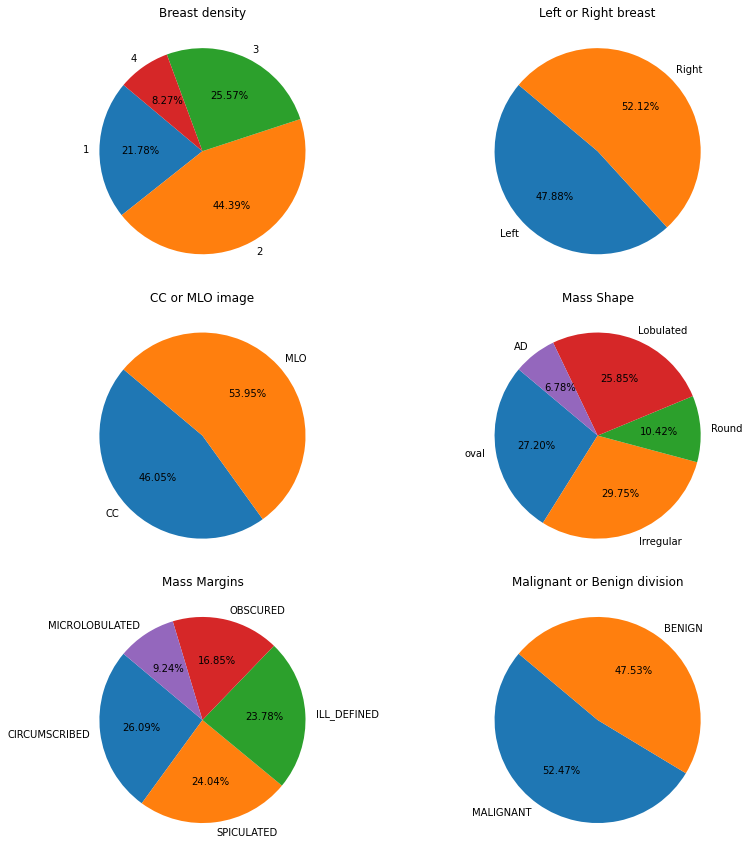

In [6]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
((ax1, ax2),(ax3, ax4), (ax5, ax6)) = ax

# Subplot 1: Laterality Distribution
density_count = mass['breast_density'].value_counts()
count_1 = density_count.loc[1]
count_2 = density_count.loc[2]
count_3 = density_count.loc[3]
count_4 = density_count.loc[4]

ax1.pie([count_1, count_2, count_3, count_4], labels=['1', '2', '3', '4'], autopct='%1.2f%%', startangle=140)
ax1.set_title('Breast density')


# Subplot 2: Orientation Distribution
mass_side = mass['left or right breast'].value_counts()
count_Left = mass_side.get('LEFT', 0)
count_Right = mass_side.get('RIGHT', 0)

ax2.pie([count_Left, count_Right], labels=['Left', 'Right'], autopct='%1.2f%%', startangle=140)
ax2.set_title('Left or Right breast')


# Subplot 3: CC vs MLO
mass_side = mass['image view'].value_counts()
count_CC = mass_side.get('CC', 0)
count_MLO = mass_side.get('MLO', 0)

ax3.pie([count_CC, count_MLO], labels=['CC', 'MLO'], autopct='%1.2f%%', startangle=140)
ax3.set_title('CC or MLO image')


# Subplot 4: mass shape
mass_shape_count = mass['mass shape'].value_counts()
count_oval = mass_shape_count.get('OVAL', 0)
count_irregular = mass_shape_count.get('IRREGULAR', 0)
count_round = mass_shape_count.get('ROUND', 0)
count_lobulated = mass_shape_count.get('LOBULATED', 0)
count_ad = mass_shape_count.get('ARCHITECTURAL_DISTORTION', 0)

ax4.pie([count_oval, count_irregular, count_round, count_lobulated,count_ad], labels=['oval', 'Irregular', 'Round', 'Lobulated', 'AD'], autopct='%1.2f%%', startangle=140)
ax4.set_title('Mass Shape')


# Subplot 5: mass margins
mass_margin_count = mass['mass margins'].value_counts()
count_c = mass_margin_count.get('CIRCUMSCRIBED', 0)
count_s = mass_margin_count.get('SPICULATED', 0)
count_illdef = mass_margin_count.get('ILL_DEFINED', 0)
count_obscured = mass_margin_count.get('OBSCURED', 0)
count_m = mass_margin_count.get('MICROLOBULATED', 0)

ax5.pie([count_c, count_s, count_illdef, count_obscured, count_m], labels=['CIRCUMSCRIBED', 'SPICULATED', 'ILL_DEFINED', 'OBSCURED', 'MICROLOBULATED'], autopct='%1.2f%%', startangle=140)
ax5.set_title('Mass Margins')


# Subplot 6: Malignant or benign
mass_side = mass['pathology'].value_counts()
count_malignant = mass_side.get('MALIGNANT', 0)
count_benign = mass_side.get('BENIGN', 0)

ax6.pie([count_malignant, count_benign], labels=['MALIGNANT', 'BENIGN'], autopct='%1.2f%%', startangle=140)
ax6.set_title('Malignant or Benign division')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Assessment accuracy

In [7]:
# Creating a new column called malignant where 1 stands for malignant and 0 else
mass['malignant'] = mass['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0})
mass

,patient_id,breast_density,left or right breast,image view,mass shape,mass margins,assessment,pathology,subtlety,malignant
0,P_00001,3,LEFT,CC,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,1.0
1,P_00001,3,LEFT,MLO,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,1.0
2,P_00004,3,LEFT,CC,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,0.0
3,P_00004,3,LEFT,MLO,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,0.0
4,P_00004,3,RIGHT,MLO,OVAL,CIRCUMSCRIBED,4,BENIGN,5,0.0
...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,1.0
1314,P_02079,2,RIGHT,CC,ROUND,SPICULATED,3,MALIGNANT,5,1.0
1315,P_02079,2,RIGHT,MLO,ROUND,SPICULATED,3,MALIGNANT,5,1.0
1316,P_02092,2,LEFT,CC,IRREGULAR,SPICULATED,3,MALIGNANT,2,1.0


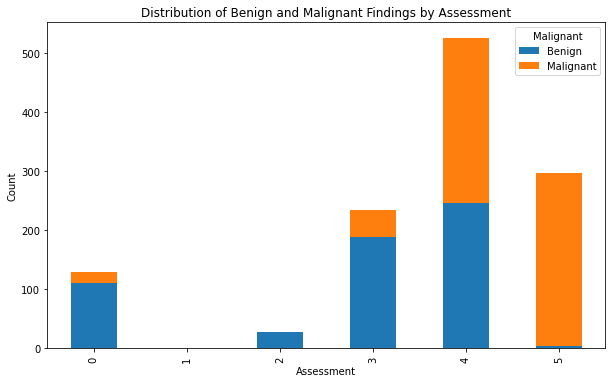

In [8]:
grouped_data = mass.groupby(['assessment', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Assessment')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [9]:
percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 0: Benign: 85.27%, Malignant: 14.73%
Assessment 1: Benign: 0.0%, Malignant: 100.0%
Assessment 2: Benign: 100.0%, Malignant: 0.0%
Assessment 3: Benign: 80.77%, Malignant: 19.23%
Assessment 4: Benign: 46.86%, Malignant: 53.14%
Assessment 5: Benign: 1.35%, Malignant: 98.65%


<ipython-input-9-a6c0d2df87c7>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)


After plotting the chart we notice that as the assessment increases, the probability of the tumour being malignant increases. We have calculated above the percentages of the tumours being benign vs malignant in order to have the exact numbers for better understanding. 

The main goal of this project is to better predict whether the tumour is malignant or not so we can possibly decrease the number of women who must have surgery in order to have the cells looked under the microscope.

### Subtlety accuracy

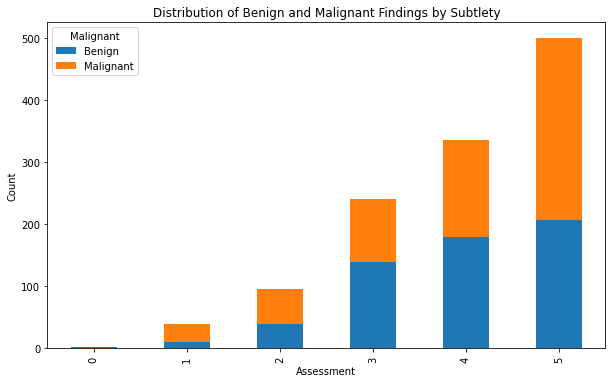

In [10]:
grouped_data_sub = mass.groupby(['subtlety', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data_sub.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Subtlety')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [11]:
percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 0: Benign: 100.0%, Malignant: 0.0%
Assessment 1: Benign: 25.0%, Malignant: 75.0%
Assessment 2: Benign: 41.67%, Malignant: 58.33%
Assessment 3: Benign: 57.92%, Malignant: 42.08%
Assessment 4: Benign: 53.57%, Malignant: 46.43%
Assessment 5: Benign: 41.2%, Malignant: 58.8%


<ipython-input-11-c022c2abe89b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)


In [12]:
mass[mass['pathology']=='MALIGNANT'].describe()

,breast_density,assessment,subtlety,malignant
count,637.000000,637.000000,637.000000,637.0
mean,2.200942,4.265306,3.985871,1.0
std,0.858073,0.976262,1.182201,0.0
min,1.000000,0.000000,1.000000,1.0
25%,2.000000,4.000000,3.000000,1.0
50%,2.000000,4.000000,4.000000,1.0
75%,3.000000,5.000000,5.000000,1.0
max,4.000000,5.000000,5.000000,1.0


## The Calc Table

In [13]:
calc = pd.read_csv('C:/Users/Maya/DDSM_CSV/calc_case_description_train_set.csv', sep=',')
calc

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...


In [14]:
# Drop irrelevant columns
calc = calc.drop(['abnormality type', 'abnormality id','image file path', 'ROI mask file path', 'cropped image file path'], axis=1)
calc

,patient_id,breast density,left or right breast,image view,calc type,calc distribution,assessment,pathology,subtlety
0,P_00005,3,RIGHT,CC,AMORPHOUS,CLUSTERED,3,MALIGNANT,3
1,P_00005,3,RIGHT,MLO,AMORPHOUS,CLUSTERED,3,MALIGNANT,3
2,P_00007,4,LEFT,CC,PLEOMORPHIC,LINEAR,4,BENIGN,4
3,P_00007,4,LEFT,MLO,PLEOMORPHIC,LINEAR,4,BENIGN,4
4,P_00008,1,LEFT,CC,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3
...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5
1542,P_02572,2,LEFT,CC,AMORPHOUS,CLUSTERED,0,MALIGNANT,2
1543,P_02572,2,LEFT,MLO,AMORPHOUS,CLUSTERED,0,MALIGNANT,2
1544,P_02584,1,LEFT,CC,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4


Note that this table is longer than the Mass's table, it contains 1545 entries.

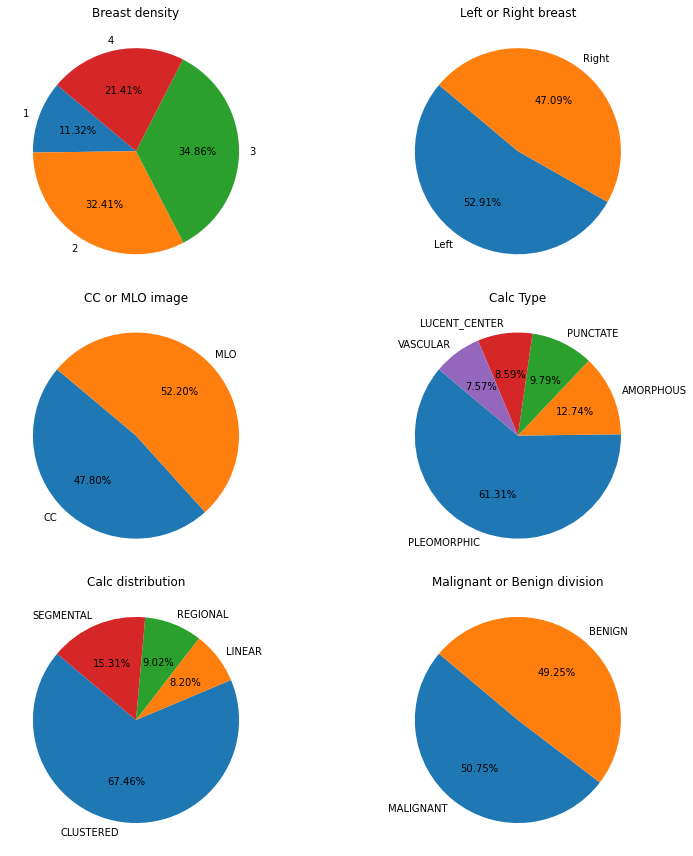

In [22]:
# Create a 3x2 grid of subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
((ax1, ax2),(ax3, ax4), (ax5, ax6)) = ax

# Subplot 1: Laterality Distribution
density_count = calc['breast density'].value_counts()
count_1 = density_count.loc[1]
count_2 = density_count.loc[2]
count_3 = density_count.loc[3]
count_4 = density_count.loc[4]

ax1.pie([count_1, count_2, count_3, count_4], labels=['1', '2', '3', '4'], autopct='%1.2f%%', startangle=140)
ax1.set_title('Breast density')


# Subplot 2: Orientation Distribution
calc_side = calc['left or right breast'].value_counts()
count_Left = calc_side.get('LEFT', 0)
count_Right = calc_side.get('RIGHT', 0)

ax2.pie([count_Left, count_Right], labels=['Left', 'Right'], autopct='%1.2f%%', startangle=140)
ax2.set_title('Left or Right breast')


# Subplot 3: CC vs MLO
calc_img = calc['image view'].value_counts()
count_CC = calc_img.get('CC', 0)
count_MLO = calc_img.get('MLO', 0)

ax3.pie([count_CC, count_MLO], labels=['CC', 'MLO'], autopct='%1.2f%%', startangle=140)
ax3.set_title('CC or MLO image')


# Subplot 4: calc type
calc_type_count = calc['calc type'].value_counts()
count_oval = calc_type_count.get('PLEOMORPHIC', 0)
count_irregular = calc_type_count.get('AMORPHOUS', 0)
count_round = calc_type_count.get('PUNCTATE', 0)
count_lobulated = calc_type_count.get('LUCENT_CENTER', 0)
count_ad = calc_type_count.get('VASCULAR', 0)

ax4.pie([count_oval, count_irregular, count_round, count_lobulated,count_ad], labels=['PLEOMORPHIC', 'AMORPHOUS', 'PUNCTATE', 'LUCENT_CENTER', 'VASCULAR'], autopct='%1.2f%%', startangle=140)
ax4.set_title('Calc Type')


# Subplot 5: calc distribution
calc_distribution_count = calc['calc distribution'].value_counts()
count_c = calc_distribution_count.get('CLUSTERED', 0)
count_s = calc_distribution_count.get('LINEAR', 0)
count_illdef = calc_distribution_count.get('REGIONAL', 0)
count_obscured = calc_distribution_count.get('SEGMENTAL', 0)


ax5.pie([count_c, count_s, count_illdef, count_obscured], labels=['CLUSTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL'], autopct='%1.2f%%', startangle=140)
ax5.set_title('Calc distribution')


# Subplot 6: Malignant or benign
calc_pathology = calc['pathology'].value_counts()
count_malignant = calc_pathology.get('MALIGNANT', 0)
count_benign = calc_pathology.get('BENIGN', 0)

ax6.pie([count_malignant, count_benign], labels=['MALIGNANT', 'BENIGN'], autopct='%1.2f%%', startangle=140)
ax6.set_title('Malignant or Benign division')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [16]:
# Creating a new column called malignant where 1 stands for malignant and 0 else
calc['malignant'] = calc['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0})
calc

,patient_id,breast density,left or right breast,image view,calc type,calc distribution,assessment,pathology,subtlety,malignant
0,P_00005,3,RIGHT,CC,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.0
1,P_00005,3,RIGHT,MLO,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.0
2,P_00007,4,LEFT,CC,PLEOMORPHIC,LINEAR,4,BENIGN,4,0.0
3,P_00007,4,LEFT,MLO,PLEOMORPHIC,LINEAR,4,BENIGN,4,0.0
4,P_00008,1,LEFT,CC,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,NaN
...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,1.0
1542,P_02572,2,LEFT,CC,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,1.0
1543,P_02572,2,LEFT,MLO,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,1.0
1544,P_02584,1,LEFT,CC,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,0.0


## Assessment Accuracy

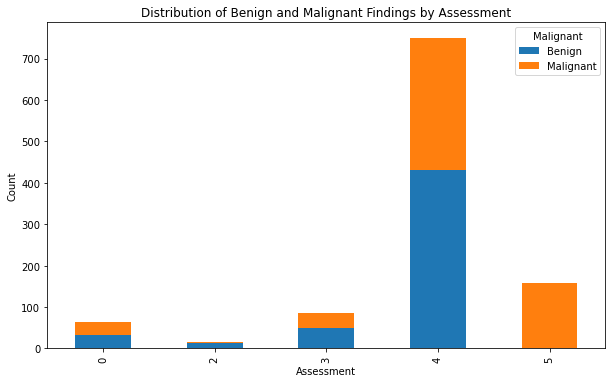

In [17]:
grouped_data = calc.groupby(['assessment', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Assessment')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [18]:
percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 0: Benign: 50.79%, Malignant: 49.21%
Assessment 2: Benign: 93.33%, Malignant: 6.67%
Assessment 3: Benign: 57.65%, Malignant: 42.35%
Assessment 4: Benign: 57.47%, Malignant: 42.53%
Assessment 5: Benign: 1.26%, Malignant: 98.74%


<ipython-input-18-a6c0d2df87c7>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)


## Subtlety Accuracy

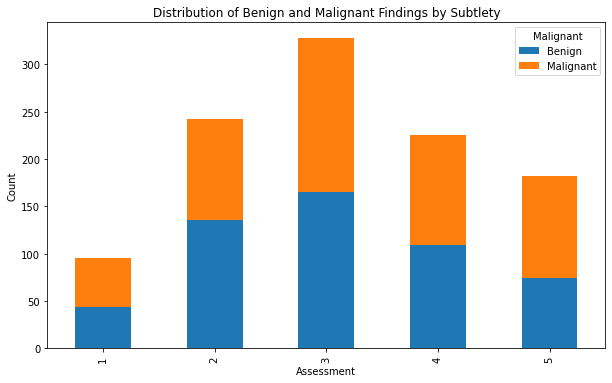

In [19]:
grouped_data_sub = calc.groupby(['subtlety', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data_sub.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Subtlety')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [20]:
percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 1: Benign: 46.32%, Malignant: 53.68%
Assessment 2: Benign: 56.2%, Malignant: 43.8%
Assessment 3: Benign: 50.3%, Malignant: 49.7%
Assessment 4: Benign: 48.44%, Malignant: 51.56%
Assessment 5: Benign: 40.66%, Malignant: 59.34%


<ipython-input-20-c022c2abe89b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)


In [21]:
calc[calc['pathology']=='MALIGNANT'].describe()

,breast density,assessment,subtlety,malignant
count,544.000000,544.000000,544.000000,544.0
mean,2.761029,3.990809,3.227941,1.0
std,0.892916,1.129672,1.236146,0.0
min,1.000000,0.000000,1.000000,1.0
25%,2.000000,4.000000,2.000000,1.0
50%,3.000000,4.000000,3.000000,1.0
75%,3.000000,5.000000,4.000000,1.0
max,4.000000,5.000000,5.000000,1.0


# Convert the catagorial attributes to numberical

In [23]:
calc_copy = calc.copy()
df_calc_numerical = pd.get_dummies(calc_copy, columns=['left or right breast', 'calc type','calc distribution', 'pathology'], prefix=[ 'left or right breast', 'calc type', 'calc distribution','pathology'])
df_calc_numerical.rename(columns={"left or right breast_0": "Left_breast", "left or right breast_1": "Right_breast",
                                "calc type_0": "AMORPHOUS_calc_type", "calc type_1": "PLEOMORPHIC_calc_type", "calc type_2": "PUNCTATE_calc_type", "calc type_3": "LUCENT_CENTER_calc_type", "calc type_4": "VASCULAR_calc_type",
                                  "calc distribution_0" : "CLUSTERED_distribution", "calc distribution_1" : "LINEAR_distribution", "calc distribution_2" : "REGIONAL_distribution", "calc distribution_3" : "SEGMENTAL_distribution",
                                  "pathology_0" : "MALIGNANT", "pathology_1" : "BENIGN" 
                                 }, inplace=True)

df_calc_numerical

,patient_id,breast density,image view,assessment,subtlety,malignant,left or right breast_LEFT,left or right breast_RIGHT,calc type_AMORPHOUS,calc type_AMORPHOUS-PLEOMORPHIC,...,calc distribution_CLUSTERED-SEGMENTAL,calc distribution_DIFFUSELY_SCATTERED,calc distribution_LINEAR,calc distribution_LINEAR-SEGMENTAL,calc distribution_REGIONAL,calc distribution_REGIONAL-REGIONAL,calc distribution_SEGMENTAL,pathology_BENIGN,pathology_BENIGN_WITHOUT_CALLBACK,pathology_MALIGNANT
0,P_00005,3,CC,3,3,1.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,P_00005,3,MLO,3,3,1.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,P_00007,4,CC,4,4,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,P_00007,4,MLO,4,4,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,P_00008,1,CC,2,3,NaN,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,MLO,5,5,1.0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1542,P_02572,2,CC,0,2,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1543,P_02572,2,MLO,0,2,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1544,P_02584,1,CC,0,4,0.0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [27]:
df_calc_numerical.corr()

,breast density,assessment,subtlety,malignant,left or right breast_LEFT,left or right breast_RIGHT,calc type_AMORPHOUS,calc type_AMORPHOUS-PLEOMORPHIC,calc type_AMORPHOUS-ROUND_AND_REGULAR,calc type_COARSE,...,calc distribution_CLUSTERED-SEGMENTAL,calc distribution_DIFFUSELY_SCATTERED,calc distribution_LINEAR,calc distribution_LINEAR-SEGMENTAL,calc distribution_REGIONAL,calc distribution_REGIONAL-REGIONAL,calc distribution_SEGMENTAL,pathology_BENIGN,pathology_BENIGN_WITHOUT_CALLBACK,pathology_MALIGNANT
breast density,1.000000,0.177277,-0.216053,-0.049906,0.019551,-0.019551,0.001009,0.023885,0.015830,-0.075316,...,0.020449,0.173658,-0.034581,0.020449,-0.035817,-0.018021,0.100948,0.144991,-0.228444,0.076584
assessment,0.177277,1.000000,-0.133697,0.172262,0.017249,-0.017249,0.055929,0.077345,0.026599,-0.170053,...,0.034361,-0.139733,0.109512,0.043632,0.043831,0.015347,0.181874,0.209109,-0.669717,0.438964
subtlety,-0.216053,-0.133697,1.000000,0.068741,-0.034625,0.034625,-0.138057,-0.018352,0.022007,0.098082,...,0.028429,0.139155,-0.105462,-0.019869,0.101423,0.012697,-0.005485,-0.213046,0.337821,-0.114608
malignant,-0.049906,0.172262,0.068741,1.000000,0.021139,-0.021139,-0.083738,-0.001588,0.052190,-0.053772,...,-0.069484,-0.047807,0.140461,0.067440,0.108727,-0.031016,0.085643,-1.000000,NaN,1.000000
left or right breast_LEFT,0.019551,0.017249,-0.034625,0.021139,1.000000,-1.000000,0.009013,-0.034690,0.041597,-0.021943,...,0.053737,0.003587,0.046380,0.030913,0.019153,0.024001,0.008785,0.007190,-0.047207,0.038439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
calc distribution_REGIONAL-REGIONAL,-0.018021,0.015347,0.012697,-0.031016,0.024001,-0.024001,-0.007965,-0.002250,-0.001122,-0.003872,...,-0.001449,-0.003984,-0.006325,-0.001449,-0.006655,1.000000,-0.008883,0.035326,-0.016917,-0.018746
calc distribution_SEGMENTAL,0.100948,0.181874,-0.005485,0.085643,0.008785,-0.008785,0.043764,0.063848,-0.015396,-0.053141,...,-0.019889,-0.054675,-0.086810,-0.019889,-0.091330,-0.008883,1.000000,0.020263,-0.191610,0.164878
pathology_BENIGN,0.144991,0.209109,-0.213046,-1.000000,0.007190,-0.007190,0.171594,0.029557,-0.031756,-0.082100,...,0.079093,-0.041377,-0.062548,-0.041023,-0.104805,0.035326,0.020263,1.000000,-0.478889,-0.530651
pathology_BENIGN_WITHOUT_CALLBACK,-0.228444,-0.669717,0.337821,NaN,-0.047207,0.047207,-0.208176,-0.058813,-0.029320,0.200588,...,-0.037877,0.134521,-0.111401,-0.037877,0.066739,-0.016917,-0.191610,-0.478889,1.000000,-0.489956


In [31]:
corr_matrix = df_calc_numerical.corr()
corr_matrix["pathology_MALIGNANT"].sort_values(ascending = False).head(5)


pathology_MALIGNANT                1.000000
malignant                          1.000000
assessment                         0.438964
calc type_PLEOMORPHIC              0.337530
calc type_FINE_LINEAR_BRANCHING    0.179971
Name: pathology_MALIGNANT, dtype: float64

After having converted the categorical attributes to numerical, we can identify the highest correlation with malignant pathology. We can, of course, ignore the first two lines and notice that the correlation between assessment and malignant pathology is 0.43, indicating there is much room for improvement. Furthermore, the second-highest correlation is with calc type 'pleomorphic,' suggesting it strongly influences the pathology. We will pay attention to this correlation list when choosing our attributes.

In [26]:
mass_copy = mass.copy()
df_mass_numerical = pd.get_dummies(mass_copy, columns=['left or right breast', 'mass shape', 'mass margins', 'pathology'],
                                   prefix=['left or right breast', 'mass shape', 'mass margins', 'pathology'])

df_mass_numerical.rename(columns={"left or right breast_0": "Left_breast", "left or right breast_1": "Right_breast",
                                  "mass shape_0": "OVAL", "mass shape_1": "IRREGULAR", "mass shape_2": "ROUND", "mass shape_3": "LOBULATED", "mass shape_4": "ARCHITECTURAL_DISTORTION",
                                  "mass margins_0": "SPICULATED", "mass margins_1": "ILL_DEFINED", "mass margins_2": "CIRCUMSCRIBED", "mass margins_3": "MICROLOBULATED","mass margins_4": "OBSCURED", 
                                  "pathology_0": "MALIGNANT", "pathology_1": "BENIGN"
                                  }, inplace=True)

df_mass_numerical

,patient_id,breast_density,image view,assessment,subtlety,malignant,left or right breast_LEFT,left or right breast_RIGHT,mass shape_ARCHITECTURAL_DISTORTION,mass shape_ASYMMETRIC_BREAST_TISSUE,...,mass margins_MICROLOBULATED-ILL_DEFINED-SPICULATED,mass margins_MICROLOBULATED-SPICULATED,mass margins_OBSCURED,mass margins_OBSCURED-ILL_DEFINED,mass margins_OBSCURED-ILL_DEFINED-SPICULATED,mass margins_OBSCURED-SPICULATED,mass margins_SPICULATED,pathology_BENIGN,pathology_BENIGN_WITHOUT_CALLBACK,pathology_MALIGNANT
0,P_00001,3,CC,4,4,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,P_00001,3,MLO,4,4,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,P_00004,3,CC,4,3,0.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,P_00004,3,MLO,4,3,0.0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,P_00004,3,MLO,4,5,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,MLO,3,4,1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1314,P_02079,2,CC,3,5,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1315,P_02079,2,MLO,3,5,1.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1316,P_02092,2,CC,3,2,1.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [32]:
df_mass_numerical.corr()

,breast_density,assessment,subtlety,malignant,left or right breast_LEFT,left or right breast_RIGHT,mass shape_ARCHITECTURAL_DISTORTION,mass shape_ASYMMETRIC_BREAST_TISSUE,mass shape_FOCAL_ASYMMETRIC_DENSITY,mass shape_IRREGULAR,...,mass margins_MICROLOBULATED-ILL_DEFINED-SPICULATED,mass margins_MICROLOBULATED-SPICULATED,mass margins_OBSCURED,mass margins_OBSCURED-ILL_DEFINED,mass margins_OBSCURED-ILL_DEFINED-SPICULATED,mass margins_OBSCURED-SPICULATED,mass margins_SPICULATED,pathology_BENIGN,pathology_BENIGN_WITHOUT_CALLBACK,pathology_MALIGNANT
breast_density,1.000000,0.060066,-0.290062,-0.048099,0.022073,-0.022073,0.144548,-0.028898,0.037433,0.020886,...,-0.009076,-0.009076,0.055894,0.117597,0.050324,0.050324,0.031521,0.081722,-0.145469,-0.002654
assessment,0.060066,1.000000,0.076325,0.503043,-0.011141,0.011141,0.046371,-0.009178,-0.025147,0.271781,...,0.013659,0.013659,-0.474624,-0.002640,0.019331,0.029086,0.405093,-0.427334,-0.178072,0.520318
subtlety,-0.290062,0.076325,1.000000,0.033218,0.015916,-0.015916,-0.127691,0.037651,-0.082924,-0.068583,...,0.001208,0.018902,-0.095181,-0.146484,-0.048374,0.001710,0.101896,-0.043452,0.047392,0.017571
malignant,-0.048099,0.503043,0.033218,1.000000,0.067731,-0.067731,0.112525,0.077516,-0.021617,0.394362,...,0.038662,0.038662,-0.344048,0.093430,0.054721,0.054721,0.466635,-1.000000,NaN,1.000000
left or right breast_LEFT,0.022073,-0.011141,0.015916,0.067731,1.000000,-1.000000,-0.040076,-0.019570,0.011514,0.058264,...,-0.037361,0.001658,0.002918,0.011514,-0.025265,0.002346,0.046242,-0.055847,-0.026989,0.070004
left or right breast_RIGHT,-0.022073,0.011141,-0.015916,-0.067731,-1.000000,1.000000,0.040076,0.019570,-0.011514,-0.058264,...,0.037361,-0.001658,-0.002918,-0.011514,0.025265,-0.002346,-0.046242,0.055847,0.026989,-0.070004
mass shape_ARCHITECTURAL_DISTORTION,0.144548,0.046371,-0.127691,0.112525,-0.040076,0.040076,1.000000,-0.031555,-0.030744,-0.153153,...,-0.009910,-0.009910,-0.106565,-0.030744,-0.014025,-0.014025,0.146972,-0.115434,0.055248,0.084795
mass shape_ASYMMETRIC_BREAST_TISSUE,-0.028898,-0.009178,0.037651,0.077516,-0.019570,0.019570,-0.031555,1.000000,-0.015012,-0.074786,...,-0.004839,-0.004839,-0.034629,-0.015012,-0.006849,-0.006849,-0.064616,-0.109536,0.239929,-0.020694
mass shape_FOCAL_ASYMMETRIC_DENSITY,0.037433,-0.025147,-0.082924,-0.021617,0.011514,-0.011514,-0.030744,-0.015012,1.000000,-0.072864,...,-0.004715,-0.004715,-0.050699,-0.014627,-0.006673,-0.006673,-0.062956,-0.016909,0.129877,-0.053280
mass shape_IRREGULAR,0.020886,0.271781,-0.068583,0.394362,0.058264,-0.058264,-0.153153,-0.074786,-0.072864,1.000000,...,-0.023487,0.020610,-0.185166,0.056737,-0.033241,-0.033241,0.411403,-0.341353,-0.119037,0.403108


In [34]:
corr_matrix = df_mass_numerical.corr()
corr_matrix["pathology_MALIGNANT"].sort_values(ascending = False).head(5)


pathology_MALIGNANT        1.000000
malignant                  1.000000
assessment                 0.520318
mass margins_SPICULATED    0.460381
mass shape_IRREGULAR       0.403108
Name: pathology_MALIGNANT, dtype: float64

We can see a higher correlation between pathology and assessment; however, it is still fairly low. Note that in this case, mass margins (specifically spiculated) and mass shape (irregular) have a strong effect on the result.